In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [23]:
d = pd.read_csv('Youtube04-Eminem.csv')
d.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [24]:
vectorizer = CountVectorizer()

dvec = vectorizer.fit_transform(d['CONTENT'])
print(dvec)

  (0, 58)	1
  (0, 839)	1
  (0, 574)	1
  (0, 1358)	1
  (0, 1404)	1
  (0, 879)	1
  (0, 1574)	1
  (1, 1404)	1
  (1, 130)	1
  (1, 442)	1
  (1, 1454)	1
  (1, 313)	1
  (1, 180)	1
  (1, 1391)	1
  (1, 1277)	1
  (1, 231)	1
  (2, 947)	1
  (2, 1250)	1
  (2, 750)	1
  (2, 1135)	1
  (2, 1019)	1
  (2, 67)	1
  (2, 963)	1
  (2, 1148)	1
  (2, 973)	1
  :	:
  (445, 636)	1
  (445, 1199)	1
  (445, 1373)	1
  (445, 1132)	1
  (445, 557)	1
  (445, 910)	1
  (445, 465)	1
  (445, 1495)	2
  (445, 537)	1
  (445, 95)	1
  (445, 268)	1
  (445, 937)	1
  (445, 6)	1
  (446, 1269)	1
  (446, 1539)	1
  (446, 1174)	1
  (446, 829)	1
  (446, 193)	1
  (446, 1141)	1
  (446, 616)	1
  (447, 1479)	1
  (447, 174)	1
  (447, 79)	1
  (447, 62)	1
  (447, 82)	1


In [25]:
daptarkata = vectorizer.get_feature_names()
print(daptarkata)

['00', '000', '047000', '09', '10', '100', '1000', '100877300245414', '11', '12', '12year', '1337', '14', '15', '16', '17', '17yr', '18', '19', '1990', '1b', '1billion', '200', '2005', '2008', '200k', '2010', '2013', '2014', '2015', '21', '23', '23active', '23awesome', '23eminem', '23king', '23lovethewayyoulie', '23rapgod', '23rt', '23share', '25', '26', '26t22', '28', '2asfn9shghk', '2b4wywphi8c', '2nd', '2zme8f', '30', '31st', '365', '36loseweight', '39', '3rd', '4000', '4000dollars', '41', '43', '447935454150', '45', '46', '476000', '482', '490', '4e', '4th', '50', '500', '500k', '5tu9gn1l310', '60', '600', '600m', '613000', '6_h0m5sayho', '710000', '7k', '800', '832000', '857', '87', '90', '940', 'abbas', 'ablaze', 'about', 'above', 'absolutely', 'abuse', 'abuses', 'abusive', 'abusue', 'acaer', 'acceptance', 'accidental', 'accomplished', 'achieve', 'across', 'act', 'activates', 'active', 'actual', 'actually', 'ad', 'adam', 'adapt', 'adhoc', 'admitting', 'adult', 'advance', 'adverti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
dshuf = d.sample(frac=1)
dshuf

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
173,z12agrbxiwabvrb2g22pfpcqys2eyrwbd04,Candela Camacho,2015-05-25T20:10:45.656000,What nicei⛺♥♥♥♥﻿,0
268,z12xu1bi1umyxxs2023ejhfpuumozd45n04,Ferhad Babayev,2015-05-23T08:55:42.007000,Hello. İ am from Azerbaijan<br />﻿,0
340,LneaDw26bFsPpgYyHcGAJk2dyALknpZ1ITQKBmY32HI,Chelsea Cameron,NaN,*****PLEASE READ***** Hey everyone! I&#39;m a...,1
109,LneaDw26bFu5UYF_PGCmMngzhI9QbSqmuO8zWFK0DCk,MegaEvilMonkee,NaN,Check out Em&#39;s dope new song monster here:...,1
262,LneaDw26bFupd-SDZSJybM-YnylZY3yw4Hx0dpG5Ars,deazy99,NaN,I know that maybe no one will read this but PL...,1
...,...,...,...,...,...
29,z13mwrzgekanfjbnw23pgfwzwzf4wxgwv04,Maryf,2015-05-28T19:27:42.212000,Rihanna is absolutely gorgeous in this video.﻿,0
181,LneaDw26bFv1OK5quUOMAxJiN8tdhKPRzQMpB13UZpY,Jerry White,NaN,You guys should check out this EXTRAORDINARY w...,1
15,z13kyh3gdnnzdvxjt04ch5xzwlvjyfujpik,Lauralyn Karoll,NaN,"<a href=""https://www.facebook.com/groups/10087...",1
38,z13ss524vpztvf2de23cyz2bmlfbvtcx304,Melissa Erhart,NaN,Check out this playlist on YouTube:chcfcvzfzfb...,1


In [27]:
d_train = dshuf[:300]
d_test = dshuf[300:]

In [28]:
d_train_att = vectorizer.fit_transform(d_train['CONTENT'])
print(d_train_att)

  (0, 1163)	1
  (0, 732)	1
  (1, 489)	1
  (1, 100)	1
  (1, 416)	1
  (1, 135)	1
  (1, 178)	1
  (2, 1163)	1
  (2, 816)	1
  (2, 865)	1
  (2, 496)	1
  (2, 347)	1
  (2, 37)	3
  (2, 15)	1
  (2, 1210)	1
  (2, 752)	1
  (2, 1000)	1
  (2, 1171)	1
  (2, 638)	1
  (2, 1065)	2
  (2, 948)	1
  (2, 873)	1
  (2, 107)	1
  (2, 1111)	1
  (2, 250)	1
  :	:
  (296, 1192)	1
  (296, 24)	1
  (296, 342)	1
  (297, 752)	1
  (297, 968)	1
  (297, 343)	1
  (297, 158)	1
  (297, 430)	1
  (297, 727)	1
  (298, 717)	1
  (298, 210)	1
  (298, 775)	1
  (298, 728)	1
  (298, 968)	1
  (298, 325)	1
  (298, 1128)	1
  (299, 178)	10
  (299, 107)	1
  (299, 968)	1
  (299, 1054)	1
  (299, 554)	1
  (299, 61)	1
  (299, 858)	1
  (299, 208)	1
  (299, 140)	1


In [29]:
d_test_att = vectorizer.transform(d_test['CONTENT'])
print(d_test_att)

  (0, 204)	1
  (0, 210)	1
  (0, 496)	1
  (0, 717)	1
  (0, 775)	1
  (0, 816)	1
  (1, 210)	1
  (1, 775)	1
  (2, 18)	1
  (2, 37)	1
  (2, 39)	1
  (2, 96)	1
  (2, 107)	5
  (2, 113)	1
  (2, 123)	1
  (2, 125)	1
  (2, 149)	1
  (2, 191)	1
  (2, 204)	1
  (2, 210)	1
  (2, 233)	1
  (2, 240)	1
  (2, 257)	1
  (2, 294)	1
  (2, 313)	1
  :	:
  (144, 941)	1
  (144, 992)	1
  (144, 1030)	1
  (144, 1043)	6
  (144, 1054)	1
  (144, 1066)	1
  (144, 1136)	1
  (144, 1157)	1
  (144, 1173)	1
  (144, 1191)	1
  (144, 1215)	2
  (145, 230)	2
  (145, 360)	2
  (145, 458)	2
  (145, 520)	1
  (145, 521)	2
  (146, 210)	1
  (146, 757)	1
  (146, 775)	1
  (146, 814)	1
  (146, 1054)	1
  (146, 1220)	1
  (147, 717)	1
  (147, 1005)	1
  (147, 1065)	1


In [30]:
d_train_label=d_train['CLASS']
print(d_train_label)

173    0
268    0
340    1
109    1
262    1
      ..
138    0
296    0
260    0
375    1
20     0
Name: CLASS, Length: 300, dtype: int64


In [31]:
d_test_label=d_test['CLASS']
print(d_test_label)

227    1
251    1
388    1
243    1
120    1
      ..
29     0
181    1
15     1
38     1
107    1
Name: CLASS, Length: 148, dtype: int64


In [32]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, d_train_att, d_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2
        i += 1
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" 
              % (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.95 (+/- 0.06)
Max features: 5, num estimators: 30, accuracy: 0.95 (+/- 0.05)
Max features: 5, num estimators: 50, accuracy: 0.96 (+/- 0.03)
Max features: 5, num estimators: 70, accuracy: 0.96 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.96 (+/- 0.05)
Max features: 5, num estimators: 110, accuracy: 0.97 (+/- 0.06)
Max features: 5, num estimators: 130, accuracy: 0.96 (+/- 0.07)
Max features: 5, num estimators: 150, accuracy: 0.97 (+/- 0.05)
Max features: 5, num estimators: 170, accuracy: 0.96 (+/- 0.07)
Max features: 5, num estimators: 190, accuracy: 0.97 (+/- 0.05)
Max features: 10, num estimators: 10, accuracy: 0.91 (+/- 0.08)
Max features: 10, num estimators: 30, accuracy: 0.95 (+/- 0.08)
Max features: 10, num estimators: 50, accuracy: 0.95 (+/- 0.07)
Max features: 10, num estimators: 70, accuracy: 0.96 (+/- 0.05)
Max features: 10, num estimators: 90, accuracy: 0.96 (+/- 0.05)
Max features: 10, num estimators: 110, accura

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


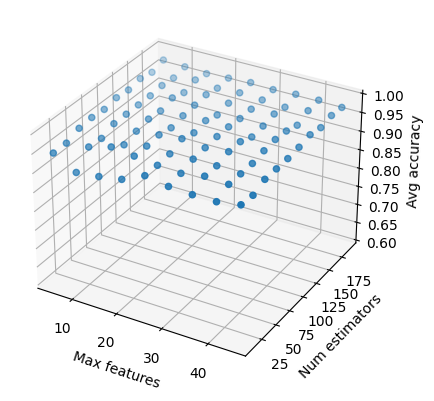

In [43]:
fig = plt.figure()
fig.clf()

ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.6, 1)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()

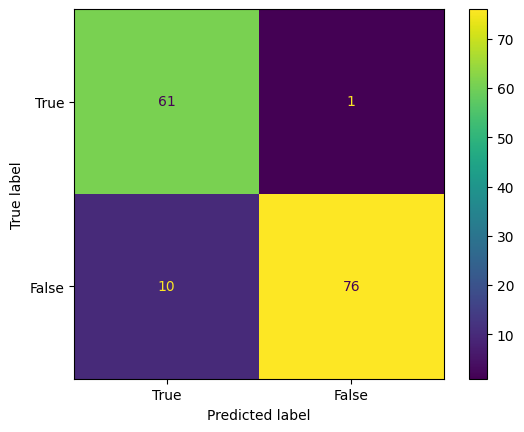

In [42]:
clf.fit(d_train_att, d_train_label)
y_pred = clf.predict(d_test_att)
cm = confusion_matrix(d_test_label, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [True, False])
cm_display.plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


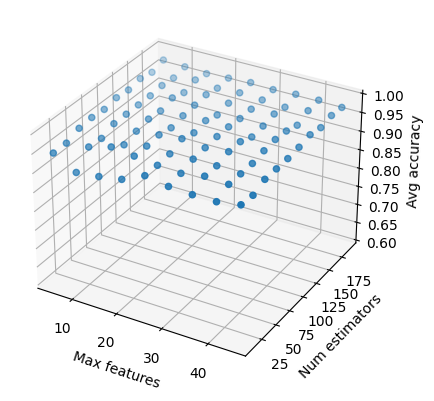